# Analise da frequência de Entidades Nomeadas

Alunos: Arthur B. Pinotti, Eduardo Brandt, Henrique F. de Azevedo, Kaue Reblin, Luiz G. Klitzke

In [42]:
# Instalação das bibliotecas e modelos de linguagem
!pip install stanza
!pip install spacy-stanza

!python -m spacy download en_core_web_lg


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/400.7 MB ? eta -:--:--
     -------------------------------------- 0.0/400.7 MB 217.9 kB/s eta 0:30:39
     -------------------------------------- 0.1/400.7 MB 409.6 kB/s eta 0:16:19
     ---------------------------------------- 0.6/400.7 MB 2.9 MB/s eta 0:02:17
     --------------------------------------- 3.7/400.7 MB 15.6 MB/s eta 0:00:26
     --------------------------------------- 3.9/400.7 MB 16.5 MB/s eta 0:00:25
     --------------------------------------- 3.9/400.7 MB 12.5 MB/s eta 0:00:32
     --------------------------------------- 4.2/400.7 MB 11.3 MB/s eta 0:00:36
     --------------------------------------- 4.6/400.7 MB 11.4 MB/s eta 0:00:35
      -------------------------------------- 5.3/400.7 MB 11.6 MB/s eta 0:00:34
      -------------------------------------- 6.8/400.7 MB 13.1 MB/s eta 0:00:30
      -------------------------------------- 8.5/400.7


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
# Importações
import spacy
import matplotlib.pyplot as plt

# Manipulação de Dados
import pandas as pd

## Carregamento e Processamento de Texto

Carregamos os dados minerados anteriormentes de um arquivo .CSV.

Obs: Precisamos eliminar as quebras de linha "\n" dos textos, porque a repetição desse caracter gerava alguns problemas e tokens inválidos ao processar com o Spacy.

In [49]:
import csv

# Criação de listas para armazenar os dados que entrarão no DataFrame
documentos = []
textos_brutos = []
textos_processados = []

# Etapa 2: Iterar pelos arquivos e ler o conteúdo
with open("DadosMinerados.csv", "r", encoding='utf-8') as infile:
    reader = csv.reader(infile, delimiter=',')

    # Pular os headers
    next(reader, None)  # skip the headers

    for row in reader:
        documentos.append(row[0])
        textos_brutos.append(row[1].replace("\n", "")) #Precisamos remover os \n para não sujar os dados à serem processados pelo spacy
        textos_processados.append(row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", "").split())

# Etapa 3: Criar o DataFrame
df = pd.DataFrame({
    'documento': documentos,
    'texto_bruto' : textos_brutos,
    'texto_processado': textos_processados,
})

# Visualizar o DataFrame
df

,documento,texto_bruto,texto_processado
0,acid-splash,Acid SplashSource: Player's HandbookConjuratio...,"[acid, splash, source, players, handbook, conj..."
1,blade-ward,Blade WardSource: Player's HandbookAbjuration ...,"[blade, ward, source, players, handbook, abjur..."
2,booming-blade,Booming BladeSource: Tasha's Cauldron of Every...,"[booming, blade, source, tashas, cauldron, eve..."
3,chill-touch,Chill TouchSource: Player's HandbookNecromancy...,"[chill, touch, source, players, handbook, necr..."
4,control-flames,Control FlamesSource: Xanathar's Guide to Ever...,"[control, flames, source, xanathars, guide, ev..."
...,...,...,...
575,time-stop,Time StopSource: Player's Handbook9th-level tr...,"[time, stop, source, players, handbook, 9thlev..."
576,true-polymorph,True PolymorphSource: Player's Handbook9th-lev...,"[true, polymorph, source, players, handbook, 9..."
577,true-resurrection,True ResurrectionSource: Player's Handbook9th-...,"[true, resurrection, source, players, handbook..."
578,weird,WeirdSource: Player's Handbook9th-level illusi...,"[weird, source, players, handbook, 9thlevel, i..."


Vamos carregar toda a base de textos em um único documento para obter suas entidades.

In [50]:
general_text = ""

for text_en in textos_brutos:
  general_text += text_en

print("Tamanho do texto geral: " + str(len(general_text)))

Tamanho do texto geral: 599582


In [51]:
# Carrega o modelo de inglês
nlp_en = spacy.load('en_core_web_lg')

In [52]:
# Processa o texto
doc_en = nlp_en(general_text)

### Named Entity Recognition

Utilizando o objeto de doc, processao anteriormente, vamos analisar sua lista de entidades nomeadas.

Para isso, vamos listar o nome a uma explicação resumida de cada Label de entidade e a lista de ocorrências que encontramos dela em nossa base.

Consultamos essas descrições no material disponibilizado pelo professor e no site: https://dataknowsall.com/blog/ner.html.

In [54]:
print(f"Quantidade de entidades nomeadas: {len(doc_en.ents)}\n")

# Inicializando o mapa para agrupar entidades por label
entidades_por_label = {}

# Iterando pelas entidades nomeadas obtidas
for ent in doc_en.ents:
    label = ent.label_  # Obtém o label da entidade
    texto = ent.text    # Obtém o texto da entidade
    
    # Adiciona a entidade ao grupo correspondente no dicionário
    if label not in entidades_por_label:
        entidades_por_label[label] = []  # Cria uma lista se o label não existir
    entidades_por_label[label].append(texto)

# Ordenando as labels por quantidade de ocorrências
labels_ordenados = sorted(entidades_por_label.items(), key=lambda item: len(item[1]), reverse=True)

# Dicionário de descrições para as labels
descricao_labels = {
    "ORG": "Refere-se a organizações, como empresas, agências governamentais e instituições. Exemplo: Apple como uma organização.",
    "GPE": "Identifica entidades geopolíticas, como países, estados, cidades e regiões que têm fronteiras reconhecidas. Exemplo: U.K. como uma entidade geopolítica.",
    "MONEY": " Indica quantias em dinheiro, incluindo a moeda e o valor. Exemplo: $1 billion representa uma quantidade monetária.",
    
    "PERSON": "Nome de uma pessoa específica. Exemplo: Albert Einstein.",
    "DATE": "Datas específicas, como dias, meses, anos ou períodos. Exemplo: January 2022 ou yesterday.",
    "TIME": "Expressões de tempo mais detalhadas, como horas do dia ou períodos específicos. Exemplo: 5 p.m..",
    "LOC": "Locais geográficos que não são considerados entidades geopolíticas, como mares, montanhas, e outras características geográficas. Exemplo: Mount Everest.",
    "PERCENT": "Representa porcentagens, incluindo o sinal de porcentagem. Exemplo: 15%.",
    "QUANTITY": "Quantidades ou medidas, geralmente acompanhadas de unidades, que não representam dinheiro. Exemplo: 200 kilometers.",
    "PRODUCT": "Refere-se a nomes de produtos, como dispositivos, veículos e tecnologias. Exemplo: iPhone.",
    "EVENT": "Eventos específicos, como guerras, competições, desastres naturais, entre outros. Exemplo: World War II.",
    "WORK_OF_ART": "Obras de arte como livros, músicas, filmes e outras criações artísticas. Exemplo: Mona Lisa.",
    "LAW": "Nomes de leis, tratados e documentos legais. Exemplo: Constitution of the United States.",
    "LANGUAGE": "Nomes de idiomas.",
    "FAC": "Edifícios, aeroportos, rodovias, pontes, etc.",
    "NORP": "Nacionalidades ou grupo políticos ou religiosos.",
    "ORDINAL": "Indentificação de ordem, como: first, second",
    "CARDINAL": "Números que não se encaixam em outra categoria anterior.",
}

# Exibindo o resultado
for label, entidades in labels_ordenados:
    print(f"Label: {label} | Quantidade de ocorrências: {len(entidades)}")
    print(f"Descrição: {descricao_labels.get(label)}")

    entidades_unicas = set(entidades)
    print(f"Entidades únicas({len(entidades_unicas)}): {', '.join(entidades_unicas)} \n")

Quantidade de entidades nomeadas: 6495

Label: CARDINAL | Quantidade de ocorrências: 2801
Descrição: Números que não se encaixam em outra categoria anterior.
Entidades únicas(224): five, 200, at least 150, 3d10, up to 25,000, 1d10.At, one-eighth, at least 1000, 5d12, 6d6, 24, 5d10, 78, two, 50 + 10, at least 300, one hundred, 2Moderate, Three, half, 10d10, 2d8, 1 hourYou, up to fifteen, 7, no more than 5 feet, 70, 7d6, 3Overcast, up to six, more than one, Up to 10, 6thSpeed, 3d4.Spell, Hundreds, 5, at least 600, no more than ten, 1d4 + 3 +, 36, twenty-five, four, 2d6, 7d10, at least 1, 1d6 + 3 +, 2d10, at least 2000, 4d10, an additional 5, less than 16, 18Small2516, 60, 1d10 + 3 +, 500lbs, 1d12, 1 minute40, 10.Spell, 1 +, 2HotStage, 6d8, 8 hoursYou, 2Light, 2, more than nine, Up to 8 hoursYou, 12, 0, 2d6 + 2 +, 4, up to five, up to twenty-five, at least 200, twenty, 150, six, One, 26, +2, ten, 1d6, no more than 10 feet, at least 1,000, one 150, at least 500, 300, 12Large5010, 5d8.Spell

### Visualizando melhor a quantidade de ocorrências de cada label

Para melhor visualizar a diferença de ocorrência de cada label, geramos um gráfico de colunas:

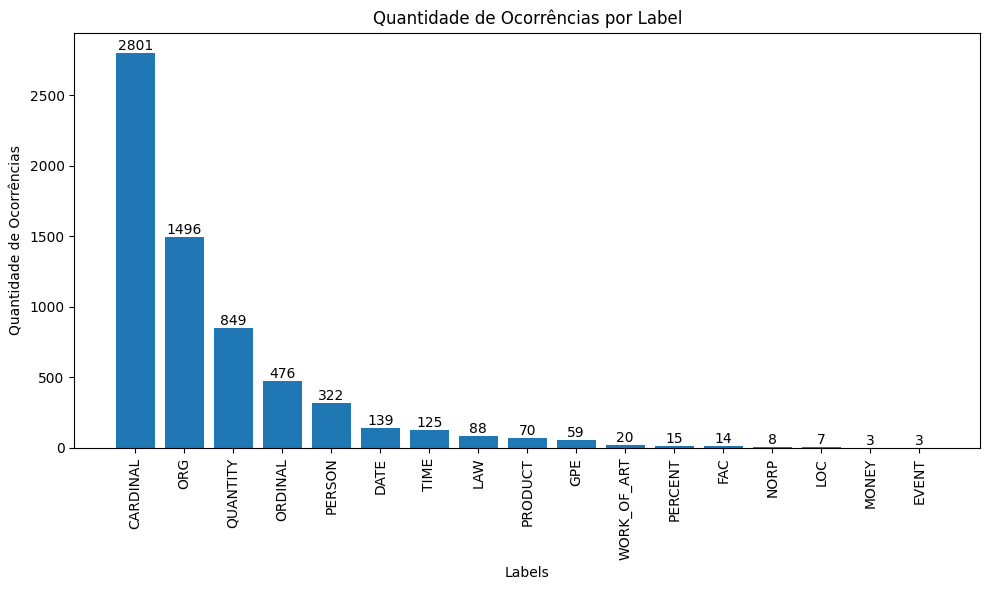

In [60]:
# Separar labels e quantidades após a ordenação
labels = [item[0] for item in labels_ordenados]
quantidades = [len(item[1]) for item in labels_ordenados]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, quantidades)

# Configurar o título e os rótulos dos eixos
plt.title("Quantidade de Ocorrências por Label")
plt.xlabel("Labels")
plt.ylabel("Quantidade de Ocorrências")

# Girar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Adicionar os valores no topo de cada barra
for i, quantidade in enumerate(quantidades):
    plt.text(i, quantidade, str(quantidade), ha='center', va="bottom")

# Mostrar o gráfico
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor legibilidade

plt.tight_layout()
plt.show()


### Interpretação dos dados

Analisando essa distribuição das labels, dentro do contexto de spells de D&D, vemos as categorias CARDINAL, ORG e QUANTITY liderando pela frequência, com destaque para  a margem expressiva apresentada pelas primeiras duas categorias, o que reflete o conteúdo técnico e descritivo dos textos/documentos analisando, além de sua conexão direta com o cenário ficcional e as regras do jogo.

Além dessa visão geral, podemos analisar melhor o que é apresentado para cada label:

1. CARDINAL (2.801 ocorrências)
Representando números absolutos que não são classificados em outras categorias, tem a maior quantidade de ocorrências, demonstra a natureza técnica das descrições de spells, frequentemente detalhando valores de dano ("3d10", "5d6"), limites ("at least 50"), ou outros aspectos quantitativos importantes para a mecânica do jogo.
As 224 entidades únicas variam entre valores fixos ("ten", "seven") e expressões associadas à jogabilidade e quantidade de dados ("1d10", "up to 15").

2. ORG (1.496 ocorrências)
Refere-se principalmente a nomes de fontes (sources) dos feitiços, classes ("Wizard", "Paladin") e suplementos de regras ("Tasha's Cauldron of Everything"), mas aparenta classificar várias coisas erroneamente como organizações.
Entidades como "Mordenkainen", "Eberron", e "Xanathar's Guide" mostram a forte influência dos materiais de referência oficiais de D&D no texto analisado.

3. QUANTITY (849 ocorrências)
Inclui medidas associadas ao alcance, duração ou peso de objetos e magias, como "5 feet", "10 gallons", e "up to 60 feet".
A frequência reforça a ênfase em especificações mecânicas para representar efeitos de spells no jogo.

4. ORDINAL (476 ocorrências)
Refere-se a posições ou níveis de feitiços, como "1st", "2nd", e "9th". Isso é essencial em D&D, pois o nível de um feitiço define seu poder e complexidade.

5. PERSON (322 ocorrências)
Inclui nomes de personagens ou figuras do cenário, como "Thor", "Moradin" e "Tasha". Destaca como o universo de D&D mistura personagens fictícios, deuses e NPCs relevantes.

6. DATE (139 ocorrências)
Indica períodos ou marcos temporais nos feitiços, como "1 day", "7 days", ou "1 year". Isso está diretamente relacionado às durações de efeitos mágicos.

7. TIME (125 ocorrências)
Mais detalhado que "DATE", concentra-se em intervalos e tempos menores, como "24 hours" ou "1 minute". Importante para descrever a execução ou duração exata de um spell.

8. LAW (88 ocorrências)
A única entidade reconhecida, "Constitution", indicada um possível erro de interpretação desse status do personagem como uma Constituição governamental ou algo similar.

9. PRODUCT (70 ocorrências)
Refere-se a elementos específicos, como "Magic Circle" ou "Teleportation Circle".

10. GPE (59 ocorrências)
Nomes de locais fictícios ou geopolíticos, como "Toril" ou "Krynn", são exemplos do cenário rico e variado do jogo.

11. WORK_OF_ART (20 ocorrências)
Inclui nomes de obras fictícias ou itens narrativos, como "Storm of Vengeance After".

12. PERCENT (15 ocorrências)
Também indica valores de dano e resistência das spells.

13. FAC (14 ocorrências)
Lista alguns marcos ficcionais do D&D ("the Elemental Plane of Fire, "the Outer Planes"), mas não necessáriamente o objetivo original dessa label.

14. NORP (8 ocorrências)
Indica nacionalidades reais como "arabic" mas engloba a classe "Barbarian" e até mesmo o indicador de dados "5d8".

15. LOC (7 ocorrências)
Suas 3 entidades únicas indicam "Astral", "the Sea of Fire" e "Earth". 

16. MONEY (3 ocorrências)
Agrupo alguns valoes apartentementes erroneos, com "up to 500 pounds" sendo o mais próximo do objetivo original da label, se considerarmos "pounds" no sentido monetário.

17. EVENT (3 ocorrências)
Indica aqui, corretamente, eventos chave de algumas speels ("the Greater Restoration", "Break", "the Reality Break").